In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [5]:
(X_train,Y_train) , (X_test,Y_test) = keras.datasets.mnist.load_data()

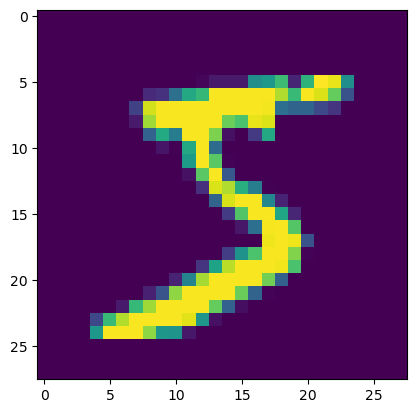

In [6]:
plt.imshow(X_train[0])

In [15]:
X_train = X_train / 255
X_test = X_test / 255

In [16]:
# .reshape(row,col),image_size(pixels)=28*28
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [17]:
# number of nodes in output layer=10,input_shape=28*28
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']
)

model.fit(X_train_flattened,Y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 918us/step - accuracy: 0.8767 - loss: 0.4688
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 866us/step - accuracy: 0.9151 - loss: 0.3037
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 867us/step - accuracy: 0.9212 - loss: 0.2832
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 866us/step - accuracy: 0.9237 - loss: 0.2731
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 879us/step - accuracy: 0.9258 - loss: 0.2662


In [19]:
model.evaluate(X_test_flattened,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - accuracy: 0.9257 - loss: 0.2653 


[0.2653263509273529, 0.9257000088691711]

In [21]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0] # gives the predicted probabilty for fisrt image from number 0-9.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step


array([1.7642932e-02, 2.6314024e-07, 6.0233966e-02, 9.6314299e-01,
       1.9968818e-03, 1.0809574e-01, 1.3186482e-06, 9.9978542e-01,
       1.0641387e-01, 7.0675230e-01], dtype=float32)

In [22]:
np.argmax(y_predicted[0]) #getting the number which has maximum probability

np.int64(7)

In [24]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5] #[start:stop]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [25]:
# labels:-actual ouput list , predictions:-predicted output list
cm = tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    2,    1,    0,    5,    4,    4,    1,    1],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   4,    9,  933,   11,    8,    6,   12,   11,   35,    3],
       [   4,    0,   20,  913,    0,   33,    2,   13,   17,    8],
       [   1,    1,    5,    1,  915,    0,   10,    4,    9,   36],
       [  10,    1,    3,   29,    7,  784,   16,    9,   27,    6],
       [  12,    3,    6,    1,    7,   12,  914,    2,    1,    0],
       [   1,    5,   23,    7,    5,    1,    0,  958,    1,   27],
       [   8,    9,    8,   24,    9,   32,    9,   13,  854,    8],
       [  10,    6,    1,   11,   27,    9,    0,   29,    5,  911]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Actual')

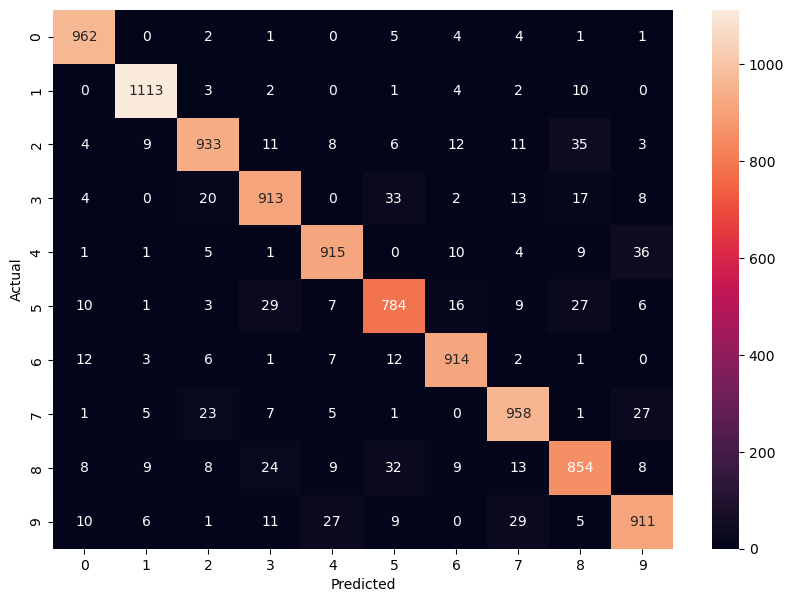

In [27]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")